In [2]:
from bs4 import BeautifulSoup as BS
import requests
import csv
import re
import pandas as pd
from pandas import DataFrame

In [5]:
def turnpage(i):
    if i==0:
        url='https://search.jd.com/Search?keyword=%E7%AC%94%E8%AE%B0%E6%9C%AC%E7%94%B5%E8%84%91%E8%87%AA%E8%90%A5&psort=3&spm=2.1.0&psort=3&click=0'
    else:
        url='https://search.jd.com/Search?keyword=%E7%AC%94%E8%AE%B0%E6%9C%AC%E7%94%B5%E8%84%91%E8%87%AA%E8%90%A5&psort=3&spm=2.1.0&psort=3&page='+str(2*i+1)+'&s='+str(60*i)+'&click=1'
    return url   
    
def gettext(url):
    try:
        head={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"}
        r=requests.get(url,headers=head)
        r.raise_for_status()
        r.encoding=r.apparent_encoding
        text=r.text
        
        return text
    except:
        return '爬取失败'
def getpriceandhtml(text):
    dict={}
    L1=[]
    L2=[]
    soup=BS(text,'html.parser')
    price=soup.findAll('i')
    L3=re.findall(r'//item.jd.com/[0-9]+.html',text)
    L=[]
    for j in L3:
        if j not in L2:
            L2.append(j)
            
    
    for j in price:
        try:
            f=float(j.string)
            if f>1000:
                L1.append(f)
        except:
            continue
    #print(len(L1),len(L2))
    for i in range(len(L1)):
        L.append([L1[i],L2[i]])
    return L
L=[]
for k in range(31):
    url=turnpage(k)    
    text=gettext(url)
    L1=getpriceandhtml(text)
    L.extend(L1)
#print(L)
with open('website.csv','w') as f1:
    f=csv.writer(f1)
    for i in L:
        f.writerow(i)
    print('ok')
#P爬取31页网页的网址与价格，输入csv文件并保存，print ok

ok


In [8]:
def getinfo(text):
    soup=BS(text,'html.parser')
    m=soup.findAll('li')
    L=[]
    soup=BS(text,'html.parser')
    m=soup.findAll('li')
    try:
        name=re.search('商品名称：.+?<',str(m))
        L.append(name.group()[5:-1])
    except:
        L.append('none')
    try:   
        wei=re.search('裸机重量：.+?<',str(m))
        L.append(wei.group()[5:-1])
    except:
        L.append('none')
    try:
        thi=re.search('厚度：.+?<',str(m))
        L.append(thi.group()[3:-1])
    except:
        L.append('none')
    try:
        big=re.search('屏幕尺寸：.+?<',str(m))
        L.append(big.group()[5:-1])
    except:
        L.append('none')
    try:
        time=re.search('待机时长：.+?<',str(m))
        L.append(time.group()[5:-1])
    except:
        L.append('none')
    try:
        area=re.search('商品产地：.+?<',str(m))
        L.append(area.group()[5:-1])
    except:
        L.append('none')
    try:
        color=re.search('屏幕色域：.+?<',str(m))
        L.append(color.group()[5:-1])
    except:
        L.append('none')
    try:
        sys=re.search('系统：.+?<',str(m))
        L.append(sys.group()[3:-1])
    except:
        L.append('none')
    try:
        try:
            xiancun=re.search('显存容量：.+?<',str(m))
            L.append(xiancun.group()[5:-1])
        except:
            xiancun=re.search('显存：.+?<',str(m))
            L.append(xiancun.group()[3:-1])
    except:
        L.append('none')
    try:
        try:
            neicun=re.search('内存容量：[0-9]+?G<',str(m))
            L.append(neicun.group()[5:-1])
        except:
            neicun=re.search('内存：[0-9]+?G<',str(m))
            L.append(neicun.group()[3:-1])    
    except:
        L.append('none')
    try:
        try:
            yinpan=re.search('硬盘：[0-9]+G.+?<',str(m))
            L.append(yinpan.group()[3:-1])
        except:
            yinpan=re.search('硬盘容量：[0-9]+G.+?<',str(m))
            L.append(yinpan.group()[5:-1])
    except:
        L.append('none')
    try:
        try:
            xianka=re.search('显卡(型号|类别)：.+?<',str(m))
            L.append(xianka.group()[5:-1])
        except:
            xianka=re.search('显卡：.+?<',str(m))
            L.append(xianka.group()[3:-1])
    except:
        L.append('none')
    return L
                
with open('website.csv') as f1:
    reader=csv.reader(f1)
    i=0
    with open('data.csv','w',encoding='utf-8') as f2:
        writer=csv.writer(f2)
        writer.writerow(['价格','网址','商品名称','裸机重量','厚度','屏幕尺寸','待机时长','商品产地','屏幕色域','系统','显存','内存','硬盘','显卡'])
        for row in reader:
            if i%2==0:
                url=row[1]
                url='https:'+url
                text=gettext(url)
                L=getinfo(text)
                L=row+L
                writer.writerow(L)
            i=i+1

    print('ok')
    #在每个网址中搜索对应数据，并写入csv，print ok,耗时十余分钟  

ok


In [6]:
info=pd.read_csv('data.csv',encoding='utf-8')
info.drop(['网址','屏幕色域','商品产地','系统'],axis=1,inplace=True)

#系统、商品产地基本一致，因此选择删除
#考虑到将none数据去除的作用不大，因此就放在了这里
#增加一列 品牌
Lbrand=[]
for i in info['商品名称']:
    Lbrand.append(i[0:2])
info['品牌']=Lbrand  #Th 表示thinkpad,Ap表示Apple
print(info)

          价格                    商品名称     裸机重量             厚度       屏幕尺寸  \
0     4999.0                 联想小新Pro  1-1.5KG  15.1mm—18.0mm  13-13.9英寸   
1     5499.0               联想小新Air14  1-1.5KG  15.1mm—18.0mm  14-14.9英寸   
2     4199.0           华为荣耀MagicBook  1-1.5KG  15.1mm—18.0mm  14-14.9英寸   
3     7299.0                    华硕天选  2-2.5kg  20.0mm—25.0mm     15.6英寸   
4     4499.0                    联想小新  1.5-2kg  15.1mm—18.0mm  15-15.9英寸   
..       ...                     ...      ...            ...        ...   
755  20692.0   AppleMacBook Pro 13.3     none           none       none   
756  13399.0         微软Surface Pro X     none      7.1mm-9mm         其他   
757   8499.0  ThinkPadThinkPad-T490s  1-1.5KG  15.1mm—18.0mm       none   
758   6299.0              ThinkPadS3  1.5-2kg  18.1mm—20.0mm       none   
759   7299.0              DELL灵越7490     none           none       none   

      待机时长          显存    内存        硬盘         显卡  品牌  
0    ＞12小时  共享系统内存（集成）   16G  512G SSD     

In [7]:
#对部分数据的分析
info1=info.head(20)
#销量前n=20名的价位相关
print('平均价格：'+str(round(info1['价格'].mean(),1))) 
print('最高价格：'+str(info1['价格'].max()))
print('最低价格：'+str(info1['价格'].min()))

平均价格：5709.0
最高价格：9499.0
最低价格：4199.0


In [8]:
def group(search):#将前二十名进行分组
    grouped=info1.groupby(by=search)
    L1=[]
    L2=[]
    for key,data in grouped:
        L1.append(key)
        L2.append(len(data))
    dict={search:L1,'数量':L2}
    brand=pd.DataFrame(dict)
    brand1=brand.sort_index(axis=0,ascending=False,by=['数量'])
    print(brand1)

L1=['品牌']#品牌
L2=['厚度','裸机重量','屏幕尺寸']#便携程度
L3=['待机时长']#待机时长
L4=['内存','显存','显卡','硬盘']#电脑配置

In [9]:
for i in L1:
    group(i)

   品牌  数量
4  联想   8
0  华为   7
1  华硕   2
2  惠普   2
3  戴尔   1


C:\Users\29778\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  # Remove the CWD from sys.path while we load stuff.


In [10]:
for i in L2:
    group(i)

              厚度  数量
1  15.1mm—18.0mm  14
2  20.0mm—25.0mm   3
3       25.0mm以上   2
0      15.0mm及以下   1
      裸机重量  数量
1  1.5-2kg   8
0  1-1.5KG   6
2  2-2.5kg   5
3     none   1
        屏幕尺寸  数量
1  14-14.9英寸   6
3     15.6英寸   5
0  13-13.9英寸   3
2  15-15.9英寸   3
4    16英寸及以上   2
5       none   1


C:\Users\29778\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  # Remove the CWD from sys.path while we load stuff.


In [6]:
for i in L3:
    group(i)

    待机时长  数量
5  ＞12小时   7
0  5-7小时   3
1  7-9小时   3
2  9小时以上   3
3   none   2
4  小于5小时   2


C:\Users\29778\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


In [7]:
for i in L4:
    group(i)

    内存  数量
0  16G  16
1   8G   4
           显存  数量
0         2GB   9
4  共享系统内存（集成）   4
2          6G   3
1          4G   2
3        none   2
          显卡  数量
3  入门级游戏独立显卡   9
5       集成显卡   5
0    GTX1650   2
2    RTX2060   2
1  GTX1660Ti   1
4         其他   1
         硬盘  数量
0  512G SSD  18
1      none   2


C:\Users\29778\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


In [24]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False


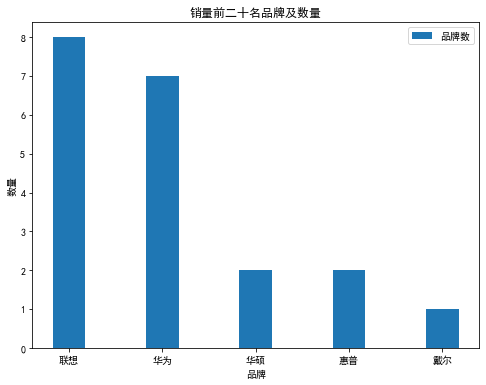

In [52]:
#绘制前二十名品牌数量柱状图
plt.figure(figsize=(8,6))
plt.subplot(1,1,1)
N=5
values=(8,7,2,2,1)
index=np.arange(N)
width=0.35
p1=plt.bar(index,values,width,label='品牌数')
plt.xlabel('品牌')
plt.ylabel('数量')
plt.title('销量前二十名品牌及数量')
plt.xticks(index,('联想','华为','华硕','惠普','戴尔'))
plt.yticks(np.arange(0,9,1))
plt.legend(loc='upper right')
plt.savefig('1.jpg')
plt.show()

C:\Users\29778\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


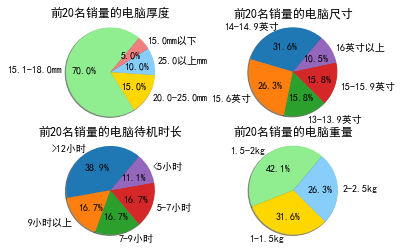

In [60]:
#饼图便携度以及待机时长占比
fig=plt.figure()
ax1=fig.add_subplot(221)
labels='15.1-18.0mm','20.0-25.0mm','25.0以上mm','15.0mm以下'
sizes=14,3,2,1
colors='lightgreen','gold','lightskyblue','lightcoral'
explode=0,0,0,0
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=50)
plt.axis('equal')
plt.title('前20名销量的电脑厚度')


ax2=fig.add_subplot(224)
labels='1.5-2kg','1-1.5kg','2-2.5kg'
sizes=8,6,5
colors='lightgreen','gold','lightskyblue'
explode=0,0,0
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=50)
plt.axis('equal')
plt.title('前20名销量的电脑重量')

ax3=fig.add_subplot(222)
labels='14-14.9英寸','15.6英寸','13-13.9英寸','15-15.9英寸','16英寸以上'
sizes=6,5,3,3,2
explode=0,0,0,0,0
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=50)
plt.axis('equal')
plt.title('前20名销量的电脑尺寸')

ax4=fig.add_subplot(223)
labels='>12小时','9小时以上','7-9小时','5-7小时','<5小时'
sizes=7,3,3,3,2
explode=0,0,0,0,0
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=50)
plt.axis('equal')
plt.title('前20名销量的电脑待机时长')

plt.savefig('2.jpg')
fig.show()

C:\Users\29778\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


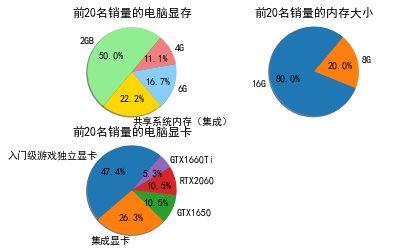

In [122]:
#电脑相关性能的饼图绘制
fig=plt.figure()
ax5=fig.add_subplot(222)
labels='16G','8G'
sizes=16,4
explode=0,0
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=50)
plt.axis('equal')
plt.title('前20名销量的内存大小')

ax6=fig.add_subplot(221)
labels='2GB','共享系统内存（集成）','6G','4G'
sizes=9,4,3,2
explode=0,0,0,0
colors='lightgreen','gold','lightskyblue','lightcoral'
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=50)
plt.axis('equal')
plt.title('前20名销量的电脑显存')

ax7=fig.add_subplot(223)
labels='入门级游戏独立显卡','集成显卡','GTX1650','RTX2060','GTX1660Ti'
sizes=9,5,2,2,1
explode=0,0,0,0,0
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=50)
plt.axis('equal')
plt.title('前20名销量的电脑显卡')

#除了没检测到，的硬盘基本是512g ssd 因此不做显示了

plt.savefig('3.jpg')
fig.show()

In [29]:
#获得排名第n的所有信息
def getCall1():
    rank=entry2.get()
    rank=int(rank)*2
    with open('data.csv',encoding='utf-8') as f1:
        reader=csv.reader(f1)
        for i,rows in enumerate(reader):
            if i == rank:
                row = rows
    message1='价格：'+row[0]+'\n网址：'+row[1]+'\n商品名称：'+row[2]+'\n裸机重量：'+row[3]+'\n厚度：'+row[4]+'\n屏幕尺寸：'+row[5]+\
    '\n待机时长：'+row[6]+'\n商品产地：'+row[7]+'\n屏幕色域：'+row[8]+'\n系统：'+row[9]+'\n显存：'+row[10]+'\n硬盘：'+row[11]+'\n显卡：'+row[12]
    message2='\n[菜单中可查找显存、显卡等相关概念]'
    showinfo(title='信息',message=message1+message2)

In [32]:
#定义窗口函数
def No201():
    a='4999.0,//item.jd.com/100005171461.html\n5499.0,//item.jd.com/100011386554.html\
    \n4199.0,//item.jd.com/100010816812.html\
    \n7299.0,//item.jd.com/100006460635.html\
    \n4499.0,//item.jd.com/100013023568.html\
    \n5699.0,//item.jd.com/100012885246.html\
    \n4299.0,//item.jd.com/100006546527.html\
    \n4299.0,//item.jd.com/100010879626.html\
    \n6099.0,//item.jd.com/100012885264.html\
    \n5599.0,//item.jd.com/100011773090.html\
    \n6299.0,//item.jd.com/100006487373.html\
    \n6399.0,//item.jd.com/100012950510.html\
    \n4299.0,//item.jd.com/100012583158.html\
    \n9499.0,//item.jd.com/100013054330.html\
    \n4599.0,//item.jd.com/100004563443.html\
    \n5999.0,//item.jd.com/100011177202.html\
    \n6399.0,//item.jd.com/100012950506.html\
    \n5999.0,//item.jd.com/100013171828.html\
    \n4499.0,//item.jd.com/100007161973.html\
    \n7699.0,//item.jd.com/100006288375.html'
    showinfo(title='排行榜前20电脑价格与网址',message=a)
def No202():
    showinfo(title='查看排行榜前20电脑均价、最大值、最小值',message='平均价格：5709.0\n最高价格：9499.0\n最低价格：4199.0')
def explain1():
    showinfo(title='查找说明',message='可供查找的数据有【某销量排名电脑所有信息】\n【排名前20的价格网址】\n【不同电脑性能在排名前20中的数量】\n【前20名价格的最大、最小、以及均值】')
def explain2():
    showinfo(title='部分信息说明',message='显卡：包括了PCB板、显示核心（GPU）、显存、供电、散热系统，是计算机最基本的组成部分之一，用途是为计算机提供所需的图形信息进行计算以及渲染，提供给显示器信号。\n共享系统内存：就是拿一部分内存当显存，集成显卡和独立显卡都可以\
    共享系统内存。\n显存：显存容量的大小决定着显存临时存储数据的能力。')
def about():
    showinfo(title='关于',message='这是京东按销量排行笔记本电脑资料查询处')
def sorry():
    showinfo(title='提示',message='功能开发中●ˇ∀ˇ●敬请期待!')

In [33]:
import tkinter as tk
from tkinter import*
from tkinter.messagebox import *
from tkinter import ttk
#提供用户查询的gui窗口
window=tk.Tk()
window.title('笔记本电脑数据查询用户界面')
window.geometry('750x400')
#1
lb1=Label(window,text='您要查找的是？')
lb1.grid(row=0,column=0,ipadx=10,ipady=10,padx=10,pady=10)
#2
lb21=Label(window,text='京东排名第')
lb21.grid(row=1,column=0,ipadx=10,ipady=10,padx=10,pady=10)
entry2=Entry(window,width=5)
entry2.grid(row=1,column=1,ipadx=10,ipady=10,padx=10,pady=10)
lb22=Label(window,text='的全部信息')
lb22.grid(row=1,column=2,ipadx=10,ipady=10,padx=10,pady=10)
btn2=Button(window,text='确定',width=10,command=getCall1)
btn2.grid(row=1,column=3,ipadx=10,ipady=10,padx=10,pady=10)

#3
lbl31=Label(window,text='查看',width=10)
lbl31.grid(row=2,column=0,ipadx=10,ipady=10,padx=10,pady=10)
value=StringVar()
cbox=ttk.Combobox(window,width=5,textvariable=value)
cbox['values']=('品牌','尺寸','厚度','待机时长','重量','显存','内存','显卡')
cbox.grid(row=2,column=1,ipadx=10,ipady=10,padx=10,pady=10)
cbox.current(0)

def show_msg(event):
    event1=cbox.get()
    if event1=='品牌':
        message3='品牌  数量\n联想   8\n华为   7\n华硕   2\n惠普   2\n戴尔   1'
    if event1=='厚度':
        message3='厚度           数量\n15.1mm—18.0mm  14\n20.0mm—25.0mm   3\n       25.0mm以上   2\n     15.0mm及以下   1'
    if event1=='尺寸':
        message3=' 屏幕尺寸  数量\n  14-14.9英寸   6\n     15.6英寸   5\n  13-13.9英寸   3\n  15-15.9英寸   3\n    16英寸及以上   2'
    if event1=='待机时长':
        message3='待机时长  数量\n  ＞12小时   7\n  5-7小时   3\n  7-9小时   3\n  9小时以上   3\n  小于5小时   2'
    if event1=='内存':
        message3='内存  数量\n  16G  16\n   8G   4'
    if event1=='显存':
        message3='显存  数量\n         2GB   9\n  共享系统内存（集成）   4\n          6G   3\n          4G   2'
    if event1=='显卡':
        message3='显卡  数量\n  入门级游戏独立显卡   9\n       集成显卡   5\n    GTX1650   2\n    RTX2060   2\n  GTX1660Ti   1'
    if event1=='重量':
        message3='裸机重量  数量\n  1.5-2kg   8\n  1-1.5KG   6\n  2-2.5kg   5'
    showinfo(title='提示',message=message3)
cbox.bind('<<ComboboxSelected>>',show_msg)

lbl32=Label(window,text='在前二十名电脑中的不同规格数量',width=25)
lbl32.grid(row=2,column=2,ipadx=10,ipady=10,padx=10,pady=10)

lbl4=Label(window,text='查看排行榜前20电脑网址',width=20)
lbl4.grid(row=3,column=0,ipadx=10,ipady=10,padx=10,pady=10)
btn4=Button(window,text='确定',width=10,command=No201)
btn4.grid(row=3,column=2,ipadx=10,ipady=10,padx=10,pady=10)

lbl5=Label(window,text='查看排行榜前20电脑均价、最大值、最小值',width=30)
lbl5.grid(row=4,column=0,ipadx=10,ipady=10,padx=10,pady=10)
btn5=Button(window,text='确定',width=10,command=No202)
btn5.grid(row=4,column=2,ipadx=10,ipady=10,padx=10,pady=10)


#创建菜单
menubar=Menu(window)  
helpmenu = Menu(menubar)
menubar.add_cascade(label="帮助",menu=helpmenu)
helpmenu.add_command(label="查询说明",command=explain1)
helpmenu.add_command(label="部分信息说明",command=explain2)
helpmenu.add_command(label="关于",command=about)
helpmenu.add_command(label='投诉信箱',command=sorry)
helpmenu.add_command(label='退出',command=window.destroy)
window.config(menu=menubar)#显示menubar

window.mainloop()